In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./Admission_Predict.csv', index_col=0)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [17]:
# What is SOP or LOR? Don't know, so let's change its names!
df = df.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'University Rating': 'University Rating', 
                           'SOP': 'State Of Purpose', 'LOR': 'Letter Of Recomendation', 'CGPA': 'CGPA', 'Research': 'Research',
                           'Chance of Admit': 'Chance of Admit'})
df

,GRE Score,TOEFL Score,University Rating,State Of Purpose,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [18]:
# Why does LOR hasn't changed? Let's take a look at the columns names
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'State Of Purpose',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [22]:
# rename() takes for argument a mapper (reference to a function) and which axis we want to iterate over to execute that function
# strip() is a function called for strings which elimintates unused blank spaces on a string
df = df.rename(mapper=str.strip, axis='columns')
df

,GRE Score,TOEFL Score,University Rating,State Of Purpose,Letter Of Recomendation,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [29]:
# Changing all the columns names to lower case and without unused blank spaces
cols = list(df.columns)
cols = [x.lower().strip() for x in cols]
df.columns = cols
df

,gre score,toefl score,university rating,state of purpose,letter of recomendation,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


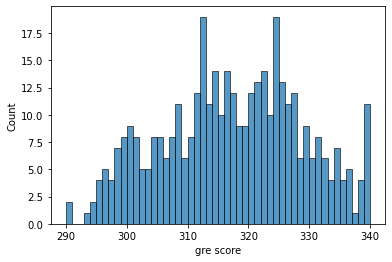

In [43]:
sns.histplot(data=df['gre score'], bins=50);

In [44]:
df['gre score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: gre score, dtype: float64

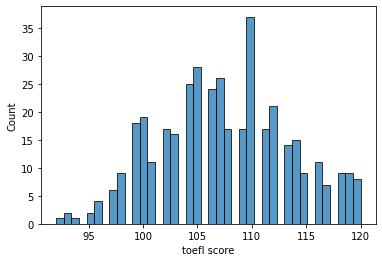

In [47]:
sns.histplot(data=df['toefl score'], bins=40);

In [48]:
df['toefl score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: toefl score, dtype: float64

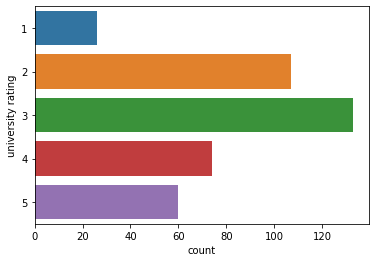

In [55]:
sns.countplot(data=df, y=df['university rating']);

In [50]:
df['university rating'].describe()

count    400.000000
mean       3.087500
std        1.143728
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: university rating, dtype: float64

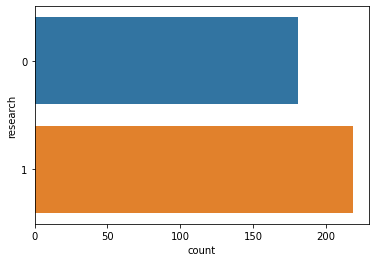

In [54]:
sns.countplot(data=df, y=df['research']);